# INSTACART FINAL ANALYSIS

### This script contains the following:
#### 1. Importing data and libraries
#### 2. Addressing PII Data
#### 3. Regional segmentation
#### 4. Excluding low activity customers
#### 5. Customer profiling
#### 6. Profile visualization
#### 7. Aggregating for customer profile
#### 8. Comparing customer profiles with regions and departments
#### 9. Answers to key questions

# -------------------------------------------------------------------------------------------------------------

## 1. Importing libraries¶

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1.1. Importing data¶

In [2]:
# We create a path to add a shortcut to our files location

path = r'C:\Users\javis\OneDrive\Documentos\Career Foundry\2. Data Immersion\4. Python\Instacart Basket Analysis'

In [3]:
# We then give Python the instruction of reading the file located in that path

instacart = pd.read_pickle(os.path.join(path, '2. Data', '2.2. Prepared Data', 'Instacart_complete.pkl'))

## 2. Addressing PII Data

In [4]:
# Firstly we check the columns, to see what personal identifiable information we have.

pd.set_option('display.max_columns', None)
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,frequency_orders,frequency_flag,surname,gender,state,age,date_joined,dependants,fam_status,income
0,7447,76142,56,5,11,4.0,False,38526,1,1,both,Garlic Bread With Mozzarella,13,20,11.0,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
1,7447,76142,56,5,11,4.0,False,39747,2,0,both,Mixed Berry English Tea Scones,93,3,6.6,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
2,7447,76142,56,5,11,4.0,False,27086,3,1,both,Half & Half,53,16,11.4,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
3,7447,76142,56,5,11,4.0,False,47310,4,0,both,Shells & White Cheddar Mac & Cheese Family Siz...,4,9,2.4,Low-range product,Low-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939
4,7447,76142,56,5,11,4.0,False,25577,5,0,both,Organic Bunny Pasta & Chicken Broth Soup,69,15,9.1,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Yang,Female,Wisconsin,75,10/23/2017,2,married,80939


We have surnames, so we are going to delete this column. The rest is fine.

### 2.1. Deleting personal information

In [5]:
instacart = instacart.drop (columns = ['surname'])

## 3. Regional segmentation

In [6]:
# Firstly let's check how many states we have

states = instacart['state'].unique()
print (states) 

['Wisconsin' 'Delaware' 'Florida' 'Illinois' 'Wyoming' 'Idaho' 'Tennessee'
 'Rhode Island' 'Nebraska' 'District of Columbia' 'Alabama' 'Nevada'
 'Pennsylvania' 'South Carolina' 'Colorado' 'New Mexico' 'North Carolina'
 'Louisiana' 'Hawaii' 'Kentucky' 'California' 'Montana' 'New York' 'Texas'
 'Vermont' 'West Virginia' 'Massachusetts' 'Arizona' 'New Hampshire'
 'Arkansas' 'Georgia' 'Missouri' 'New Jersey' 'Kansas' 'Iowa'
 'Connecticut' 'Alaska' 'Maryland' 'Oklahoma' 'Virginia' 'South Dakota'
 'Ohio' 'Maine' 'Oregon']


In [7]:
# Now let's create a list of the regions

Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','New Jersey','Pennsylvania']
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

### 3.1. Differences in spending habits

In [8]:
# We want to analyse customer spending by average cost per order

instacart['avg_order_cost_by_cust'] = instacart.groupby(['user_id'])['prices'].transform('mean')

In [11]:
# Since our spending flags column shows as Nan, let's define the flags again

instacart.loc[instacart['avg_order_cost_by_cust'] < 10, 'spender_flag'] = 'Low spender'

In [12]:
#Create spender flag criteria - high spender
instacart.loc[instacart['avg_order_cost_by_cust'] >= 10, 'spender_flag'] = 'High spender'

In [13]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,frequency_orders,frequency_flag,gender,state,age,date_joined,dependants,fam_status,income,avg_order_cost_by_cust,spender_flag
0,7447,76142,56,5,11,4.0,False,38526,1,1,both,Garlic Bread With Mozzarella,13,20,11.0,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender
1,7447,76142,56,5,11,4.0,False,39747,2,0,both,Mixed Berry English Tea Scones,93,3,6.6,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender
2,7447,76142,56,5,11,4.0,False,27086,3,1,both,Half & Half,53,16,11.4,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender
3,7447,76142,56,5,11,4.0,False,47310,4,0,both,Shells & White Cheddar Mac & Cheese Family Siz...,4,9,2.4,Low-range product,Low-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender
4,7447,76142,56,5,11,4.0,False,25577,5,0,both,Organic Bunny Pasta & Chicken Broth Soup,69,15,9.1,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender


In [14]:
# Now let's add a region column with np

condition = [instacart['state'].isin(Northeast),instacart['state'].isin(Midwest),instacart['state'].isin(South),instacart['state'].isin(West)]
definition = ['Northeast','Midwest','South','West']

instacart['region']=np.select(condition,definition)

In [15]:
# Check output

instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,frequency_orders,frequency_flag,gender,state,age,date_joined,dependants,fam_status,income,avg_order_cost_by_cust,spender_flag,region
0,7447,76142,56,5,11,4.0,False,38526,1,1,both,Garlic Bread With Mozzarella,13,20,11.0,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest
1,7447,76142,56,5,11,4.0,False,39747,2,0,both,Mixed Berry English Tea Scones,93,3,6.6,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest
2,7447,76142,56,5,11,4.0,False,27086,3,1,both,Half & Half,53,16,11.4,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest
3,7447,76142,56,5,11,4.0,False,47310,4,0,both,Shells & White Cheddar Mac & Cheese Family Siz...,4,9,2.4,Low-range product,Low-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest
4,7447,76142,56,5,11,4.0,False,25577,5,0,both,Organic Bunny Pasta & Chicken Broth Soup,69,15,9.1,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest


In [16]:
# Now we create a crosstab

crosstab = pd.crosstab(instacart['region'],instacart['spender_flag'],dropna = False)

In [17]:
# To check the output

crosstab

spender_flag,High spender,Low spender
region,,
Midwest,0,185
Northeast,6,165
South,28,405
West,17,181


It looks like there is no significant differences between the number of high and low spending customers. Low spenders represent less than 10 % in every region on our sample.

## 4. Excluding low activity customers

In [18]:
# Firstly we will create a flag for the activity, separating between low and normal activity

instacart.loc[instacart['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [19]:
# We also define the normal activity

instacart.loc[instacart['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [20]:
# To see how many values

instacart['activity_flag'].value_counts(dropna = False)

Normal activity    735
Low activity       252
Name: activity_flag, dtype: int64

### 4.1. Exporting this samples

In [19]:
# We have to create a subset for low activity customers and another one for normal activity customers
# Firstly we create the low activity one and check the shape. This set will be excluded from our analysis

instacart_low_activity = instacart[instacart['activity_flag']=='Low activity']

In [20]:
instacart_low_activity.shape

(252, 37)

In [21]:
# Now, for the customers we want to analyse

instacart_normal_activity = instacart[instacart['activity_flag']=='Normal activity']

In [22]:
# To export the subsets

instacart_low_activity.to_pickle(os.path.join(path,'2. Data','2.2. Prepared Data','instacart_low_activity.pkl'))

In [23]:
instacart_normal_activity.to_pickle(os.path.join(path,'2. Data','2.2. Prepared Data','instacart_normal_activity.pkl'))

## 5. Customer profiling

The aim here is to create a profiling variable based on age, income and number of dependents. It will be useful as well to look at the day and hour of the orders.

In [21]:
# In order to determine which departments the products belong to, let's import the departments dataframe 

departments = pd.read_csv(os.path.join(path, '2. Data', '2.1. Original Data', 'departments.csv'), index_col= 0)

In [22]:
departments

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
department_id,,,,,,,,,,,,,,,,,,,,,
department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [23]:
# Let's transpose this 

departments = departments.T

In [24]:
departments

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [25]:
# Check the age range of customers 

instacart['age'].value_counts().sort_index()

18    24
19    17
20    13
21    11
23    22
24    43
25     1
26    12
27    14
28     3
29    11
30    32
31     7
32     9
33    28
35    27
36    25
37    17
38    14
39     3
40    16
41    24
43    38
44    34
45    21
46    14
48    15
49    15
50    13
54     6
56     9
57    23
59    70
61     2
63    20
64    66
65    29
68     3
69    56
71    21
72     9
75    53
77     7
79     7
80    38
81    45
Name: age, dtype: int64

We have customers from 18 to 81 years old. I was thinking of using alcohol as a product to differentiate, but everyone can access to it so will not use this department.

In [26]:
# Let's create age ranges

instacart.loc[(instacart['age'] >= 18) & (instacart['age'] <= 24), 'Age group'] = 'Youngsters 18-24'
instacart.loc[(instacart['age'] >= 25) & (instacart['age'] <= 40), 'Age group'] = 'Busy workers 25-40'
instacart.loc[(instacart['age'] >= 41) & (instacart['age'] <= 60), 'Age group'] = 'New moderns 41-60'
instacart.loc[(instacart['age'] >= 61) & (instacart['age'] <= 81), 'Age group'] = 'Wise ones 61-81'


In [27]:
# Let's check the count

instacart ['Age group'].value_counts()

Wise ones 61-81       356
New moderns 41-60     282
Busy workers 25-40    219
Youngsters 18-24      130
Name: Age group, dtype: int64

In [28]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,frequency_orders,frequency_flag,gender,state,age,date_joined,dependants,fam_status,income,avg_order_cost_by_cust,spender_flag,region,activity_flag,Age group
0,7447,76142,56,5,11,4.0,False,38526,1,1,both,Garlic Bread With Mozzarella,13,20,11.0,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81
1,7447,76142,56,5,11,4.0,False,39747,2,0,both,Mixed Berry English Tea Scones,93,3,6.6,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81
2,7447,76142,56,5,11,4.0,False,27086,3,1,both,Half & Half,53,16,11.4,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81
3,7447,76142,56,5,11,4.0,False,47310,4,0,both,Shells & White Cheddar Mac & Cheese Family Siz...,4,9,2.4,Low-range product,Low-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81
4,7447,76142,56,5,11,4.0,False,25577,5,0,both,Organic Bunny Pasta & Chicken Broth Soup,69,15,9.1,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81


In [29]:
# Let's create income ranges

instacart.loc[(instacart['income'] < 50000), 'Income group'] = 'Lower class'
instacart.loc[(instacart['income'] >= 50000) & (instacart['income'] < 99000), 'Income group'] = 'Medium class'
instacart.loc[(instacart['income'] >= 99000) & (instacart['income'] <= 160000), 'Income group'] = 'Upper class'
instacart.loc[(instacart['income'] > 160000), 'Income group'] = 'Richionaires'

In [30]:
# Let's check the count 

instacart ['Income group'].value_counts()

Upper class     442
Medium class    355
Lower class     111
Richionaires     79
Name: Income group, dtype: int64

In [31]:
# Let's create categories for the number of dependants.

instacart.loc[(instacart['dependants'] <= 0), 'Parental group'] = 'No commits'
instacart.loc[(instacart['dependants'] > 0) & (instacart['dependants'] <= 1), 'Parental group'] = 'Spoilers'
instacart.loc[(instacart['dependants'] > 1), 'Parental group'] = 'Busy parents'

In [32]:
# Let's check also the count of the family status

instacart ['fam_status'].value_counts()

married                             714
single                              182
divorced/widowed                     66
living with parents and siblings     25
Name: fam_status, dtype: int64

In [33]:
# Let's also create a column for the days of the week

instacart.loc[instacart['orders_day_of_week'] == 0, 'Week_day'] = 'Saturday'
instacart.loc[instacart['orders_day_of_week'] == 1, 'Week_day'] = 'Sunday'
instacart.loc[instacart['orders_day_of_week'] == 2, 'Week_day'] = 'Monday'
instacart.loc[instacart['orders_day_of_week'] == 3, 'Week_day'] = 'Tuesday'
instacart.loc[instacart['orders_day_of_week'] == 4, 'Week_day'] = 'Wednesday'
instacart.loc[instacart['orders_day_of_week'] == 5, 'Week_day'] = 'Thursday'
instacart.loc[instacart['orders_day_of_week'] == 6, 'Week_day'] = 'Friday'

In [34]:
# Lastly, let's create a profile for the hours of shopping. First let's check the range

instacart['order_hour_of_day'].value_counts().sort_index()

7       6
8      77
9      73
10    112
11    190
12    119
13    100
14     67
15     12
16     46
17     30
18     78
19     37
20      5
21     23
23     12
Name: order_hour_of_day, dtype: int64

In our sample we only have buyers from 7 am to 11 pm. let's create different ranges of buyers

In [35]:
# Let's divide the shopping time in 3 profiles 

instacart.loc[(instacart['order_hour_of_day'] >= 7) & (instacart['order_hour_of_day'] < 11), 'Shopping time'] = 'Early birds'
instacart.loc[(instacart['order_hour_of_day'] >= 11) & (instacart['order_hour_of_day'] < 19), 'Shopping time'] = 'Day shoppers'
instacart.loc[(instacart['order_hour_of_day'] >= 19), 'Shopping time'] = 'Late buyers'

In [36]:
# Let's check the count

instacart ['Shopping time'].value_counts()

Day shoppers    642
Early birds     268
Late buyers      77
Name: Shopping time, dtype: int64

## 6. Profile visualization

### 6.1. Age groups

In [37]:
# Count number of unique users

userlist = instacart['user_id'].unique()
userlist.sort()
print(userlist)

['10171' '102724' '103299' '103690' '107813' '109472' '109763' '111000'
 '114821' '115074' '115371' '115553' '115862' '116331' '116677' '117565'
 '118936' '119091' '120327' '121878' '124411' '127244' '127731' '128405'
 '128887' '129196' '13038' '131058' '131699' '132067' '135347' '136066'
 '137295' '153706' '154673' '155252' '155271' '157072' '160561' '163105'
 '168208' '169586' '171241' '173731' '175765' '179406' '183299' '185023'
 '187757' '189009' '189116' '191465' '192596' '197422' '200731' '203194'
 '205084' '205568' '206104' '24728' '25816' '27623' '28537' '31582' '3357'
 '3626' '39017' '39929' '41698' '422' '47715' '47879' '47892' '49780'
 '54263' '54711' '55806' '56916' '57633' '58662' '61924' '62056' '63975'
 '76106' '76142' '82159' '86285' '86344' '89166' '89672' '90250' '9170'
 '92461' '92796' '92843' '93750' '95845']


In [38]:
# Count number of unique users by Age group

instacart.groupby('Age group')['user_id'].nunique()

Age group
Busy workers 25-40    25
New moderns 41-60     28
Wise ones 61-81       31
Youngsters 18-24      13
Name: user_id, dtype: int64

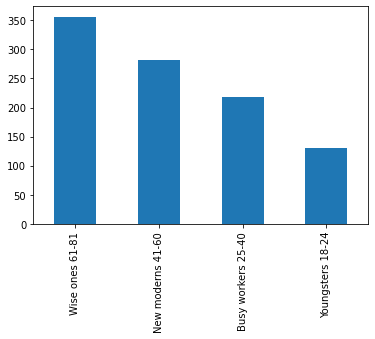

In [39]:
# Graph number of unique users by Age group

Age_bar_chart = instacart['Age group'].value_counts().plot.bar()


In [42]:
# Let's save it to our visualizations

Age_bar_chart.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Age_group_bar.png'))

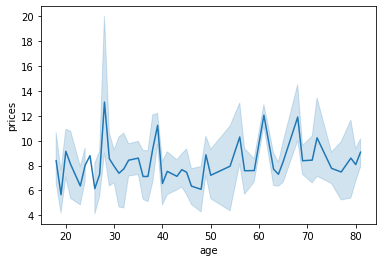

In [43]:
# Let's compare the age with the price paid

age_price_line = sns.lineplot(data = instacart, x = 'age',y = 'prices')

In [44]:
# Let's save it to our visualizations

age_price_line.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Age_price_line.png'))

### 6.2. Income groups

In [40]:
# TO get a count of the number of unique users by Income group

instacart.groupby('Income group')['user_id'].nunique()

Income group
Lower class     18
Medium class    36
Richionaires     8
Upper class     35
Name: user_id, dtype: int64

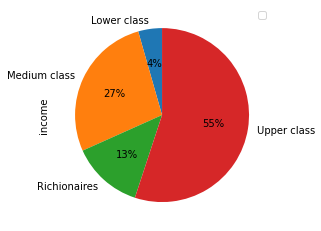

In [41]:
# Let's create a pie chart for the income

income_pie_chart = instacart.groupby(['Income group']).sum().plot(kind='pie', y = 'income', startangle=90, autopct='%1.0f%%')
plt.legend('')


In [89]:
# To save it

income_pie_chart.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Income_pie.png'))

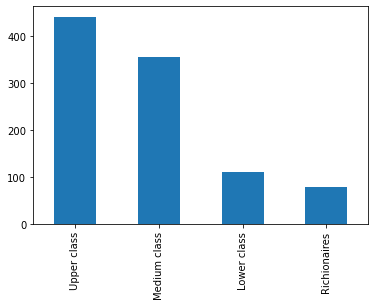

In [91]:
# Let's create a bar chart for the income groups

income_bar_chart = instacart['Income group'].value_counts().plot.bar()

income_bar_chart.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Income_bar.png'))

### 6.3. Parental groups

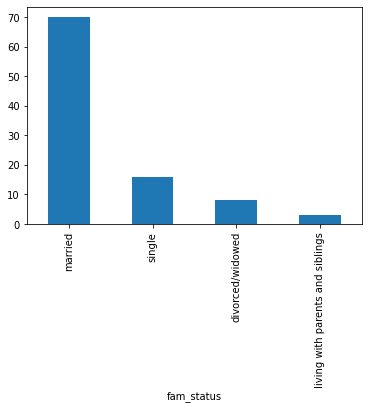

In [42]:
# To create the family status bar chart and save it

fam_status_bar = instacart.groupby('fam_status')['user_id'].nunique().sort_values(ascending=False).plot.bar()

fam_status_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Family_status_bar_desc.png'))

Most of instacart customers are married, hopefully happily!

### 6.4. Departments


In [43]:
departments

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [44]:
# To create a new column for the department names 

instacart.loc[instacart['department_id'] == 1, 'department_name'] = 'frozen'
instacart.loc[instacart['department_id'] == 2, 'department_name'] = 'other'
instacart.loc[instacart['department_id'] == 3, 'department_name'] = 'bakery'
instacart.loc[instacart['department_id'] == 4, 'department_name'] = 'produce'
instacart.loc[instacart['department_id'] == 5, 'department_name'] = 'alcohol'
instacart.loc[instacart['department_id'] == 6, 'department_name'] = 'international'
instacart.loc[instacart['department_id'] == 7, 'department_name'] = 'beverages'
instacart.loc[instacart['department_id'] == 8, 'department_name'] = 'pets'
instacart.loc[instacart['department_id'] == 9, 'department_name'] = 'dry goods pasta'
instacart.loc[instacart['department_id'] == 10, 'department_name'] = 'bulk'
instacart.loc[instacart['department_id'] == 11, 'department_name'] = 'personal care'
instacart.loc[instacart['department_id'] == 12, 'department_name'] = 'meat seafood'
instacart.loc[instacart['department_id'] == 13, 'department_name'] = 'pantry'
instacart.loc[instacart['department_id'] == 14, 'department_name'] = 'breakfast'
instacart.loc[instacart['department_id'] == 15, 'department_name'] = 'canned goods'
instacart.loc[instacart['department_id'] == 16, 'department_name'] = 'dairy eggs'
instacart.loc[instacart['department_id'] == 17, 'department_name'] = 'households'
instacart.loc[instacart['department_id'] == 18, 'department_name'] = 'babies'
instacart.loc[instacart['department_id'] == 19, 'department_name'] = 'snacks'
instacart.loc[instacart['department_id'] == 20, 'department_name'] = 'deli'
instacart.loc[instacart['department_id'] == 21, 'department_name'] = 'missing'

In [45]:
# To check unique values

instacart.groupby('department_name')['user_id'].nunique()

department_name
alcohol             2
babies             10
bakery             25
beverages          49
breakfast          18
canned goods       21
dairy eggs         67
deli               24
dry goods pasta    13
frozen             41
households         20
international      10
meat seafood       18
missing             2
pantry             35
personal care       8
pets                4
produce            68
snacks             46
Name: user_id, dtype: int64

In [46]:
# To check actual counts of sales

instacart['department_name'].value_counts()

produce            267
dairy eggs         172
snacks              92
beverages           84
frozen              82
pantry              50
canned goods        36
bakery              36
deli                31
households          25
breakfast           23
meat seafood        22
babies              20
dry goods pasta     17
personal care       12
international       10
pets                 4
alcohol              2
missing              2
Name: department_name, dtype: int64

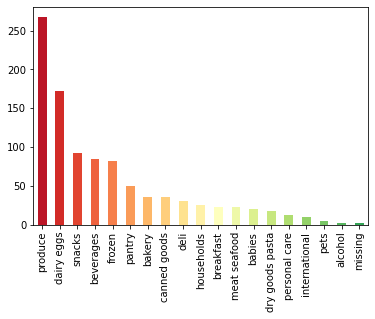

<Figure size 1440x864 with 0 Axes>

In [101]:
# To create the departments bar chart and save it

departments_bar = instacart['department_name'].value_counts().plot.bar(color = sns.color_palette('RdYlGn', 21))
plt.figure(figsize = (20,12))

departments_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'departments_sales_bar.png'))

The most popular departments are, in this order, produce, dairy eggs, snacks, beverages and frozen.

In [51]:
# To check the sum of the sales by department

instacart.groupby(['department_name'])['prices'].agg('sum')

department_name
alcohol              15.4
babies              123.0
bakery              321.8
beverages           574.3
breakfast           189.4
canned goods        258.6
dairy eggs         1441.4
deli                272.8
dry goods pasta     116.8
frozen              618.6
households          179.3
international        72.4
meat seafood        356.5
missing              18.8
pantry              424.0
personal care        84.7
pets                 31.5
produce            2282.8
snacks              380.3
Name: prices, dtype: float64

## 7. Aggregating for customer profiles

In [47]:
# Sum sales by Age group

instacart.groupby(['Age group'])['prices'].agg('sum')

Age group
Busy workers 25-40    1731.0
New moderns 41-60     2123.6
Wise ones 61-81       2916.9
Youngsters 18-24       990.9
Name: prices, dtype: float64

In [48]:
# Sum sales by Income group

instacart.groupby(['Income group'])['prices'].agg('sum')

Income group
Lower class      746.6
Medium class    2852.5
Richionaires     628.8
Upper class     3534.5
Name: prices, dtype: float64

In [49]:
# Sum sales by week day

instacart.groupby(['Week_day'])['prices'].agg('sum')

Week_day
Friday        827.6
Monday       1295.8
Saturday     1793.2
Sunday       1442.7
Thursday      948.2
Tuesday       752.3
Wednesday     702.6
Name: prices, dtype: float64

In [50]:
# Sum sales by shoppping time

instacart.groupby(['Shopping time'])['prices'].agg('sum')

Shopping time
Day shoppers    4999.5
Early birds     2179.7
Late buyers      583.2
Name: prices, dtype: float64

In [51]:
# Sum sales by parental group

instacart.groupby(['Parental group'])['prices'].agg('sum')

Parental group
Busy parents    3983.0
No commits      1973.0
Spoilers        1806.4
Name: prices, dtype: float64

In [52]:
instacart.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_from_last_order,first_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spending_flag,frequency_orders,frequency_flag,gender,state,age,date_joined,dependants,fam_status,income,avg_order_cost_by_cust,spender_flag,region,activity_flag,Age group,Income group,Parental group,Week_day,Shopping time,department_name
0,7447,76142,56,5,11,4.0,False,38526,1,1,both,Garlic Bread With Mozzarella,13,20,11.0,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81,Medium class,Busy parents,Thursday,Day shoppers,deli
1,7447,76142,56,5,11,4.0,False,39747,2,0,both,Mixed Berry English Tea Scones,93,3,6.6,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81,Medium class,Busy parents,Thursday,Day shoppers,bakery
2,7447,76142,56,5,11,4.0,False,27086,3,1,both,Half & Half,53,16,11.4,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81,Medium class,Busy parents,Thursday,Day shoppers,dairy eggs
3,7447,76142,56,5,11,4.0,False,47310,4,0,both,Shells & White Cheddar Mac & Cheese Family Siz...,4,9,2.4,Low-range product,Low-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81,Medium class,Busy parents,Thursday,Day shoppers,dry goods pasta
4,7447,76142,56,5,11,4.0,False,25577,5,0,both,Organic Bunny Pasta & Chicken Broth Soup,69,15,9.1,Mid-range product,Mid-range product,Regularly busy,Normal_days,Most busy hours,56,Loyal customer,NaN,NaN,NaN,NaN,Female,Wisconsin,75,10/23/2017,2,married,80939,9.25,Low spender,Midwest,Normal activity,Wise ones 61-81,Medium class,Busy parents,Thursday,Day shoppers,canned goods


In [60]:
# Create customer profiles

instacart.loc[(instacart['fam_status'] == 'single') & (instacart['dependants'] == 0 ), 'Custom_profile'] = 'Single, no dependents'
instacart.loc[(instacart['fam_status'] == 'single') & (instacart['dependants'] >=1 ), 'Custom_profile'] = 'Single, with dependents'

instacart.loc[(instacart['fam_status'] == 'married') & (instacart['dependants'] >=1 ) & (instacart['income'] >= 0) & (instacart['income'] < 75000), 'Custom_profile'] = 'Married, middle-low class, with dep'
instacart.loc[(instacart['fam_status'] == 'married') & (instacart['dependants'] >=1 ) & (instacart['income'] >= 75000) & (instacart['income'] < 150000), 'Custom_profile'] = 'Married, middle-high class, with dep'
instacart.loc[(instacart['fam_status'] == 'married') & (instacart['dependants'] >=1 ) & (instacart['income'] > 150000), 'Custom_profile'] = 'Married, upper class, with dep'

instacart.loc[(instacart['fam_status'] == 'married') & (instacart['dependants'] == 0 ) & (instacart['income'] >= 0) & (instacart['income'] < 75000), 'Custom_profile'] = 'Married, middle-low class, no dep'
instacart.loc[(instacart['fam_status'] == 'married') & (instacart['dependants'] == 0 ) & (instacart['income'] >= 75000) & (instacart['income'] < 150000), 'Custom_profile'] = 'Married, middle-high class, no dep'
instacart.loc[(instacart['fam_status'] == 'married') & (instacart['dependants'] == 0 ) & (instacart['income'] > 150000), 'Custom_profile'] = 'Married, upper class no dep'

In [61]:
# Count number of unique users by Customer profile

instacart.groupby('Custom_profile')['user_id'].nunique().sort_values(ascending=False)

Custom_profile
Married, middle-high class, with dep    35
Married, middle-low class, with dep     26
Single, no dependents                   16
Married, upper class, with dep           9
Young parent                             3
Name: user_id, dtype: int64

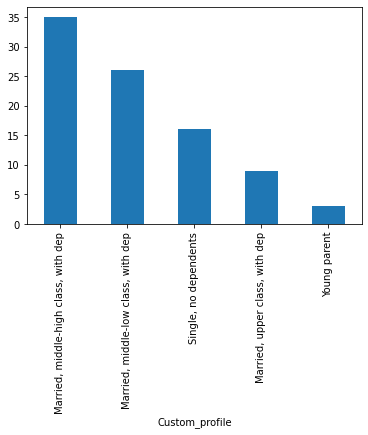

In [62]:
# To create a bar chart and save it 

Custom_profile_bar = instacart.groupby('Custom_profile')['user_id'].nunique().sort_values(ascending=False).plot.bar()

In [63]:
# To save it

Custom_profile_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Custom_profile_bar.png'))

In [64]:
# To sum the sales by customer profiles

instacart.groupby(['Custom_profile'])['prices'].agg('sum')

Custom_profile
Married, middle-high class, with dep    3342.5
Married, middle-low class, with dep     1355.7
Married, upper class, with dep           853.9
Single, no dependents                   1445.1
Young parent                             237.3
Name: prices, dtype: float64

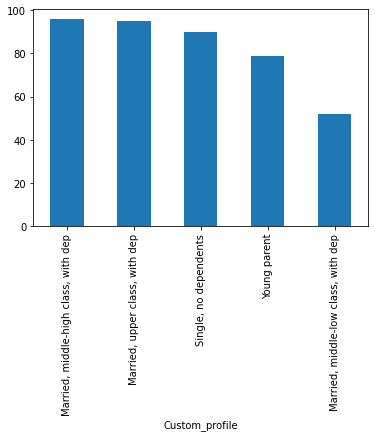

In [65]:
# To create a bar chart about the aggregated sales and save it 

Custom_profile_sales_bar = round(instacart.groupby(['Custom_profile'])['prices'].agg('sum')/instacart.groupby('Custom_profile')['user_id'].nunique(),0).sort_values(ascending=False).plot.bar()

Custom_profile_sales_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'Custom_profile_sales_bar.png'))

In [66]:
# Price analysis by customer profile

instacart.groupby('Custom_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                                          mean  min   max
Custom_profile                                           
Married, middle-high class, with dep  7.939430  1.0  20.7
Married, middle-low class, with dep   7.060937  1.0  20.7
Married, upper class, with dep        8.454455  1.1  23.3
Single, no dependents                 7.940110  1.0  21.1
Young parent                          9.492000  1.5  24.1

In [67]:
# Frequency analysis by customer profile

instacart.groupby('Custom_profile').agg({'avg_order_cost_by_cust': ['mean', 'min', 'max']})

avg_order_cost_by_cust                   
                                                       mean       min      max
Custom_profile                                                                
Married, middle-high class, with dep               7.939430  5.250000  12.6600
Married, middle-low class, with dep                7.060938  2.000000  13.1000
Married, upper class, with dep                     8.454455  6.312500  10.5000
Single, no dependents                              7.940110  5.300000  11.1000
Young parent                                       9.492000  9.146154  10.1875

## 8. Comparing customer profiles with regions and departments

### 8.1. Customer profiles vs Regions

In [68]:
Custom_vs_regions = np.round(instacart.pivot_table(index='Custom_profile', columns='region', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(Custom_vs_regions)

region                                Midwest  Northeast   South    West  \
Custom_profile                                                             
Married, middle-high class, with dep    649.0      503.0  1488.0   702.0   
Married, middle-low class, with dep     520.0      332.0   206.0   299.0   
Married, upper class, with dep            NaN       61.0   552.0   241.0   
Single, no dependents                   130.0      142.0   831.0   342.0   
Young parent                              NaN        NaN   237.0     NaN   
Total                                  1299.0     1038.0  3314.0  1583.0   

region                                 Total  
Custom_profile                                
Married, middle-high class, with dep  3343.0  
Married, middle-low class, with dep   1356.0  
Married, upper class, with dep         854.0  
Single, no dependents                 1445.0  
Young parent                           237.0  
Total                                 7234.0  


The common link between the different regions is that the customers that spend the most in every region have a profile of married adult of middle to high income, with dependants. Young parents seem to spend less on online groceries shopping.

### 8.1. Customer profiles vs Departments

In [70]:
Custom_vs_dpmts = np.round(instacart.pivot_table(index='Custom_profile', columns='department_name', values='prices', aggfunc='sum',margins = True,margins_name = 'Total'),0)
print(Custom_vs_dpmts)

department_name                       alcohol  babies  bakery  beverages  \
Custom_profile                                                             
Married, middle-high class, with dep      6.0    56.0   190.0      149.0   
Married, middle-low class, with dep       NaN    25.0    35.0      158.0   
Married, upper class, with dep            NaN    21.0     6.0      101.0   
Single, no dependents                    10.0    20.0    26.0      153.0   
Young parent                              NaN     NaN    53.0        NaN   
Total                                    15.0   123.0   311.0      562.0   

department_name                       breakfast  canned goods  dairy eggs  \
Custom_profile                                                              
Married, middle-high class, with dep      131.0          82.0       657.0   
Married, middle-low class, with dep        15.0          31.0       166.0   
Married, upper class, with dep             13.0          25.0       186.0   
Single

Respect the departments, we can see that certain goods are more likely to be shopped by higher class, like meat/seafood, dairy eggs or bakery, for example. Single with no dependants lead in the canned good shopping or beverages.

## 9. Responding to the key questions

#### 9.1.The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders

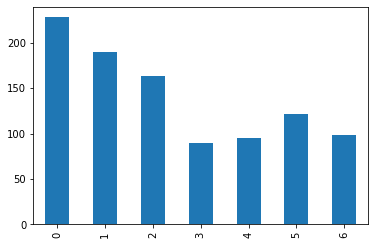

In [71]:
# We will show a bar chart with the busiest days of the week, and save it to visualizations

busiest_days_bar = instacart['orders_day_of_week'].value_counts().sort_index().plot.bar()

busiest_days_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'busiest_days_bar.png'))

Saturday and Sunday are the busiest days of the week

####  9.2. They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.


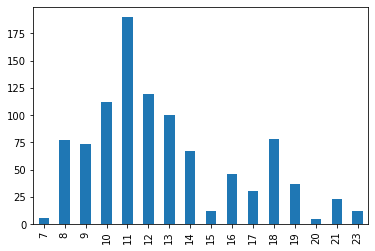

In [72]:
# Let's make a bar chart for the hours of the day, and save it to visualizations

busiest_hours_bar = instacart['order_hour_of_day'].value_counts().sort_index().plot.bar()

busiest_hours_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'busiest_hours_bar.png'))

Between 10am and 1pm are the busiest hours, being 11 the busiest one.

#### 9.3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

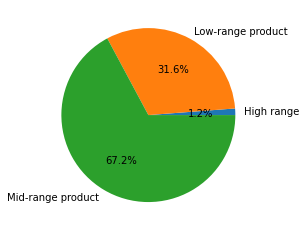

In [73]:
# Let's create a pie for the price ranges, and save it to visualizations

price_range_prod_pie = instacart['price_range'].value_counts().sort_index().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

price_range_prod_pie.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'price_range_prod_pie.png'))

Products labels could have different colours depending on if they are classed as low, middle or high range price products.

#### 9.4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders

<Figure size 1440x864 with 0 Axes>

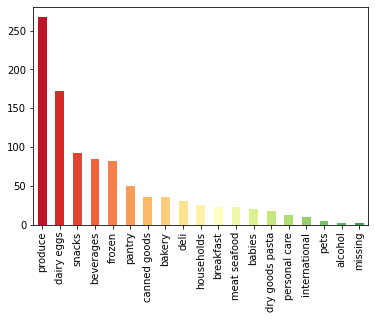

<Figure size 1440x864 with 0 Axes>

In [76]:
# Let's repeat the graph from a few step before

departments_bar = instacart['department_name'].value_counts().plot.bar(color = sns.color_palette('RdYlGn', 21))
plt.figure(figsize = (20,12))

The most popular departments are, in this order, produce, dairy eggs, snacks, beverages and frozen. These departments should receive less marketing efforts to try to impulse the rest of sales.

#### 9.5. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

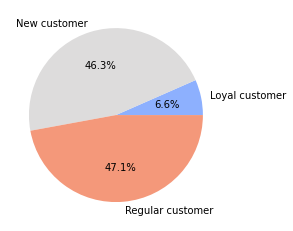

In [77]:
# Let's create a pie for the loyalty flag, and save it to visualizations

loyalty_pie = instacart['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 3))
plt.ylabel('')

loyalty_pie.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'loyalty_pie.png'))

Most of Instacart customers are new or regular customers. It would be worth it to create a system such as points and discounts to reward to those loyal customers.

#### 9.6. Are there differences in ordering habits based on a customer’s loyalty status?

In [79]:
# Let's compare the habits on price range purchases by loyalty

crosstab_price_range_loyalty = pd.crosstab(instacart['price_range'], instacart['loyalty_flag'], dropna = False)
print(crosstab_price_range_loyalty)

loyalty_flag       Loyal customer  New customer  Regular customer
price_range                                                      
High range                      1             3                 8
Low-range product              16           147               149
Mid-range product              48           307               308


There is no apparent differences between new, regular and loyal customers in orders based on the price range purchased.

In [82]:
# Let's compare the habits on price range purchases by loyalty

crosstab_department_loyalty = pd.crosstab(instacart['department_name'], instacart['loyalty_flag'], dropna = False)
print(crosstab_department_loyalty)

loyalty_flag     Loyal customer  New customer  Regular customer
department_name                                                
alcohol                       0             0                 2
babies                        1             1                18
bakery                        2            20                14
beverages                     3            41                40
breakfast                     1            13                 9
canned goods                  6            21                 9
dairy eggs                   18            78                76
deli                          1            22                 8
dry goods pasta               2             6                 9
frozen                        6            46                30
households                    1            12                12
international                 1             5                 4
meat seafood                  2             8                12
missing                       0         

#### 9.7. Are there differences in ordering habits based on a customer’s region?

In [83]:
# Let's compare the habits on department purchases by region

crosstab_dpmt_region = pd.crosstab(instacart['department_name'], instacart['region'], dropna = False)
print(crosstab_dpmt_region)

region           Midwest  Northeast  South  West
department_name                                 
alcohol                0          1      1     0
babies                 0          3     13     4
bakery                 4          4     19     9
beverages             19         17     35    13
breakfast              5          3     10     5
canned goods          10          8     13     5
dairy eggs            33         27     79    33
deli                   8          5     14     4
dry goods pasta        4          3      8     2
frozen                14         21     28    19
households             4          3     10     8
international          2          3      3     2
meat seafood           3          5     13     1
missing                0          0      1     1
pantry                11          7     26     6
personal care          2          1      6     3
pets                   1          0      2     1
produce               45         39    117    66
snacks              

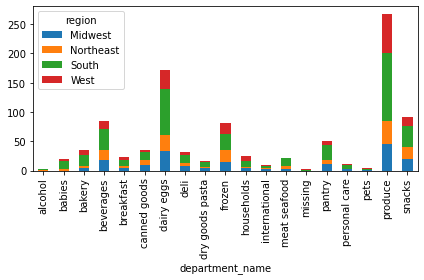

In [89]:
# Let's create a bar chart for the department purchases by region

dpmt_region_bar = crosstab_dpmt_region.plot(kind = 'bar', stacked = True)
plt.tight_layout()

dpmt_region_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'dpmt_region_bar.png'))

#### 9.8. Is there a connection between age and family status in terms of ordering habits?

In [90]:
# Let's compare age and family status

crosstab_age_status = pd.crosstab(instacart['fam_status'], instacart['Age group'], dropna = False)
print(crosstab_age_status)

Age group                         Busy workers 25-40  New moderns 41-60  \
fam_status                                                                
divorced/widowed                                   0                  0   
living with parents and siblings                   0                  0   
married                                          148                211   
single                                            71                 71   

Age group                         Wise ones 61-81  Youngsters 18-24  
fam_status                                                           
divorced/widowed                               66                 0  
living with parents and siblings                0                25  
married                                       290                65  
single                                          0                40  


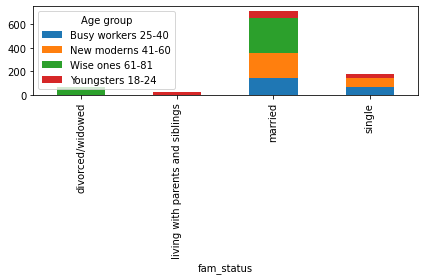

In [92]:
# Let's create a bar chart for the age and family status

age_status_bar = crosstab_age_status.plot(kind = 'bar', stacked = True)
plt.tight_layout()

age_status_bar.figure.savefig(os.path.join(path, '4. Analysis','4.1. Visualizations', 'age_status_bar.png'))

We can't conclude anything very significant from the relationship between age and family status, appart from the fact that married customers tend to spend more, and they might deserve a bigger effort in marketing to explore the impact.

In [93]:
# To export our dataframe

instacart.to_pickle(os.path.join(path, '2. Data', '2.2. Prepared Data', 'Instacart_final.pkl'))